## Discrete Time system

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from IPython.display import Image

In [2]:
def y_generator(y0, alpha):
    y =  y0
    while True:
        yield y
        y = 0.5 * (y + alpha/y)

In [3]:
for idx, y in enumerate(y_generator(1, 2)):
    print (idx, ":", y)
    if idx > 10:
        break

0 : 1
1 : 1.5
2 : 1.4166666666666665
3 : 1.4142156862745097
4 : 1.4142135623746899
5 : 1.414213562373095
6 : 1.414213562373095
7 : 1.414213562373095
8 : 1.414213562373095
9 : 1.414213562373095
10 : 1.414213562373095
11 : 1.414213562373095


In [4]:
for idx, y in enumerate(y_generator(1, 4)):
    print (idx, ":", y)
    if idx > 10:
        break

0 : 1
1 : 2.5
2 : 2.05
3 : 2.000609756097561
4 : 2.0000000929222947
5 : 2.000000000000002
6 : 2.0
7 : 2.0
8 : 2.0
9 : 2.0
10 : 2.0
11 : 2.0


In [5]:
for idx, y in enumerate(y_generator(1, 100)):
    print (idx, ":", y)
    if idx > 10:
        break

0 : 1
1 : 50.5
2 : 26.24009900990099
3 : 15.025530119986813
4 : 10.840434673026925
5 : 10.032578510960604
6 : 10.000052895642693
7 : 10.000000000139897
8 : 10.0
9 : 10.0
10 : 10.0
11 : 10.0


In [6]:
ylist = []
for idx, y in enumerate(y_generator(1, 2)):
    print (idx, ":", y)
    if idx > 10:
        break
    ylist.append(y)


0 : 1
1 : 1.5
2 : 1.4166666666666665
3 : 1.4142156862745097
4 : 1.4142135623746899
5 : 1.414213562373095
6 : 1.414213562373095
7 : 1.414213562373095
8 : 1.414213562373095
9 : 1.414213562373095
10 : 1.414213562373095
11 : 1.414213562373095


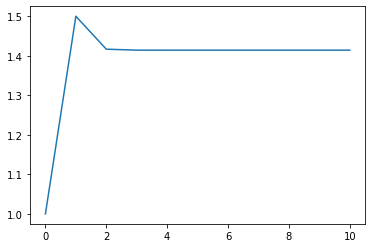

In [7]:
plt.plot(list(range(11)),ylist)

<StemContainer object of 3 artists>

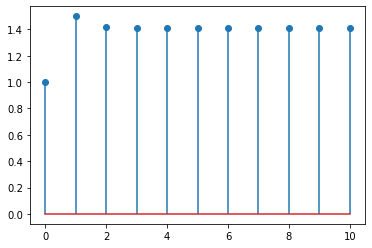

In [8]:
plt.stem(list(range(11)),ylist)

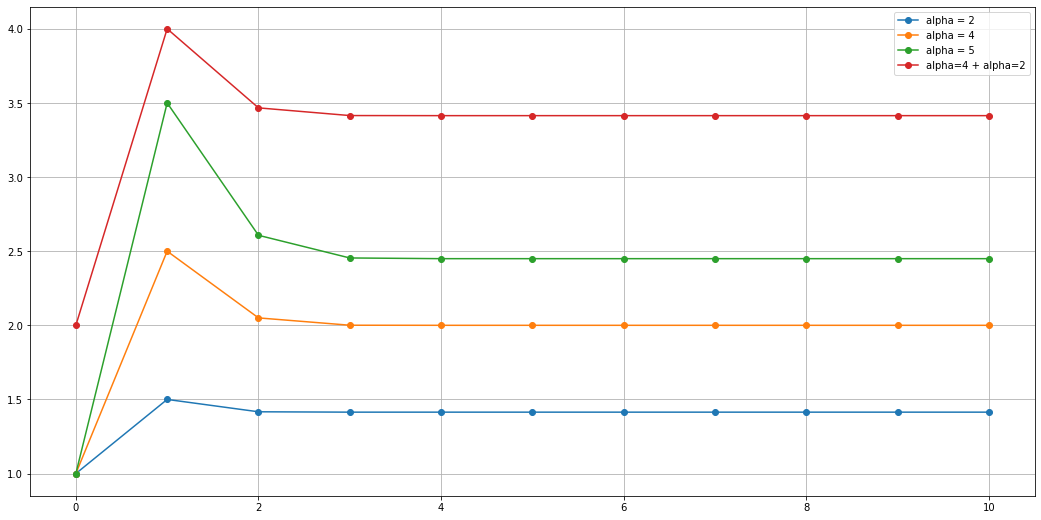

In [9]:
N = 10
y1list = []
y2list = []
y3list = []
for idx, y in enumerate(y_generator(1, 2)):
    if idx > N:
        break
    y1list.append(y)
for idx, y in enumerate(y_generator(1, 4)):
    if idx > N:
        break
    y2list.append(y)
for idx, y in enumerate(y_generator(1, 6)):
    if idx > N:
        break
    y3list.append(y)

plt.figure(figsize=(18,9))
plt.plot(list(range(N+1)), y1list, "o-", label = "alpha = 2")
plt.plot(list(range(N+1)), y2list, "o-", label = "alpha = 4")
plt.plot(list(range(N+1)), y3list, "o-", label = "alpha = 5")
plt.plot(list(range(N+1)), np.array(y1list)+np.array(y2list), "o-", label = "alpha=4 + alpha=2")
plt.legend()
plt.grid()

### Example
Moving-averaginf filter<br>
$ y[n] = \frac{1}{3} (x[n] + x[n-1] +x[n-2]) $<br>
input $x[n]$, output$y[n]$ <br>
1, $x[n] = u[n]$ , find $y[n]$ using the input-output relation and the convolution sum.

In [10]:
n = np.array( list(range(-4, 20)))
def x(n):
    return np.heaviside(n, 1)

<StemContainer object of 3 artists>

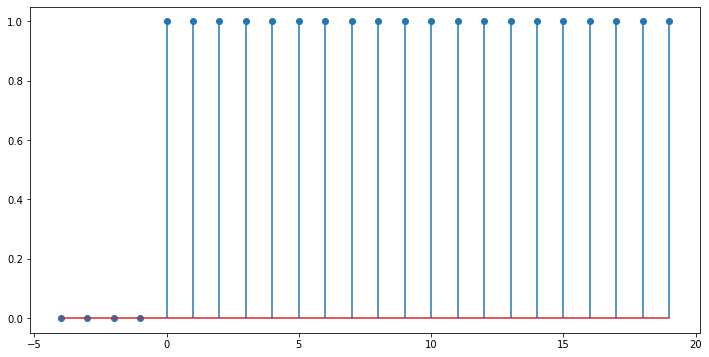

In [11]:
plt.figure(figsize = (12,6))
plt.stem(n, x(n))

In [12]:
h = np.array([1,1,1], dtype = np.float32) / 3

In [13]:
h

array([0.33333334, 0.33333334, 0.33333334], dtype=float32)

In [14]:
z = np.convolve(x(n), h, 'full')
z

array([0.        , 0.        , 0.        , 0.        , 0.33333334,
       0.66666669, 1.00000003, 1.00000003, 1.00000003, 1.00000003,
       1.00000003, 1.00000003, 1.00000003, 1.00000003, 1.00000003,
       1.00000003, 1.00000003, 1.00000003, 1.00000003, 1.00000003,
       1.00000003, 1.00000003, 1.00000003, 1.00000003, 0.66666669,
       0.33333334])

In [15]:
x(n)

array([0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

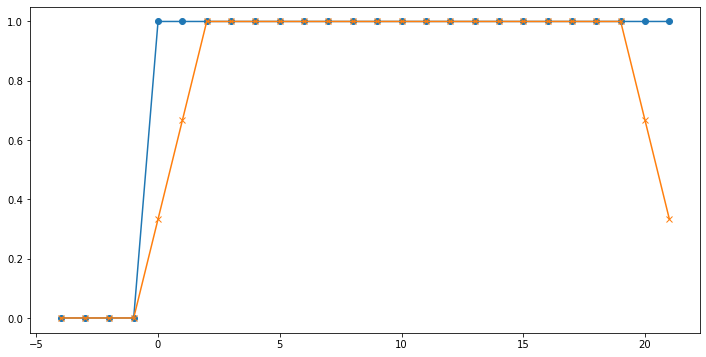

In [16]:
h = np.array([1,1,1], dtype = np.float32) / 3
z = np.convolve(x(n), h, 'full')
n2 = np.array( list(range(-4, 20+2)))
plt.figure(figsize = (12,6))
plt.plot( n2, x(n2), 'o-')
plt.plot(n2, z, 'x-')

2. $x[n] = A \cos (\frac{2 \pi n }{N})$, determine the values of A, and N,<br>
so the at the steady state response of the filter is zero.

In [17]:
N = 2
n = np.array( list(range(-4, 20)))
def x(n):
    return np.heaviside(n, 1) * np.cos( 2 * np.pi *n / N)

<StemContainer object of 3 artists>

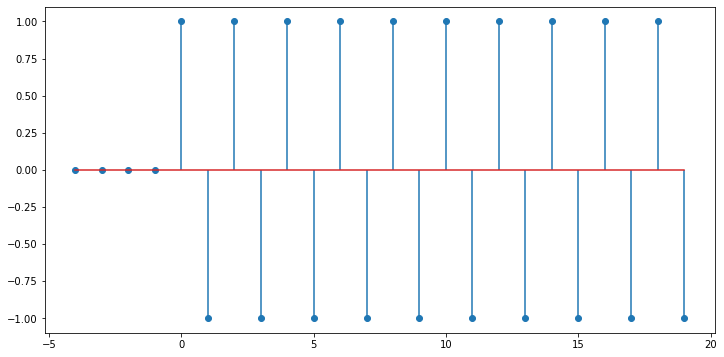

In [18]:
plt.figure(figsize = (12,6))
plt.stem(n, x(n))

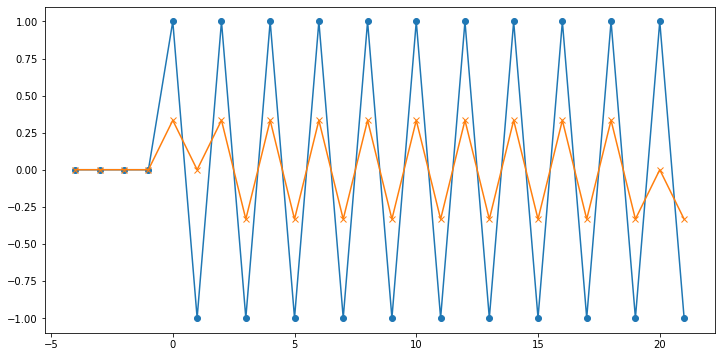

In [19]:
h = np.array([1,1,1], dtype = np.float32) / 3
z = np.convolve(x(n), h, 'full')
n2 = np.array( list(range(-4, 20+2)))
plt.figure(figsize = (12,6))
plt.plot( n2, x(n2), 'o-')
plt.plot(n2, z, 'x-')

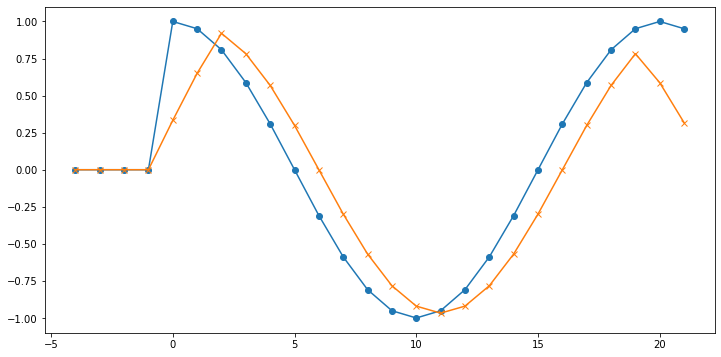

In [20]:
N = 20
n = np.array( list(range(-4, 20)))
def x(n):
    return np.heaviside(n, 1) * np.cos( 2 * np.pi *n / N)
h = np.array([1,1,1], dtype = np.float32) / 3
z = np.convolve(x(n), h, 'full')
n2 = np.array( list(range(-4, 20+2)))
plt.figure(figsize = (12,6))
plt.plot( n2, x(n2), 'o-')
plt.plot(n2, z, 'x-')

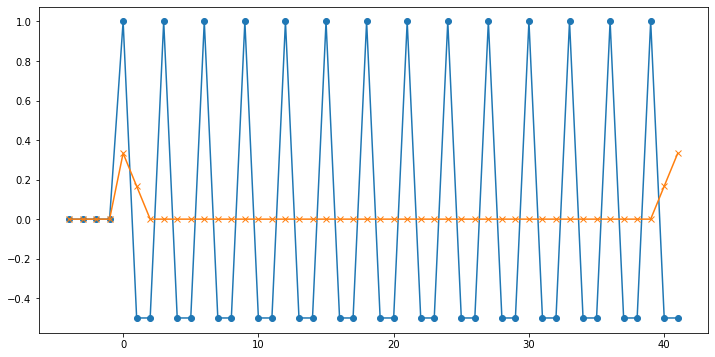

In [21]:
N = 3
n = np.array( list(range(-4, 40)))
def x(n):
    return np.heaviside(n, 1) * np.cos( 2 * np.pi *n / N)
h = np.array([1,1,1], dtype = np.float32) / 3
z = np.convolve(x(n), h, 'full')
n2 = np.array( list(range(-4, 40+2)))
plt.figure(figsize = (12,6))
plt.plot( n2, x(n2), 'o-')
plt.plot(n2, z, 'x-')

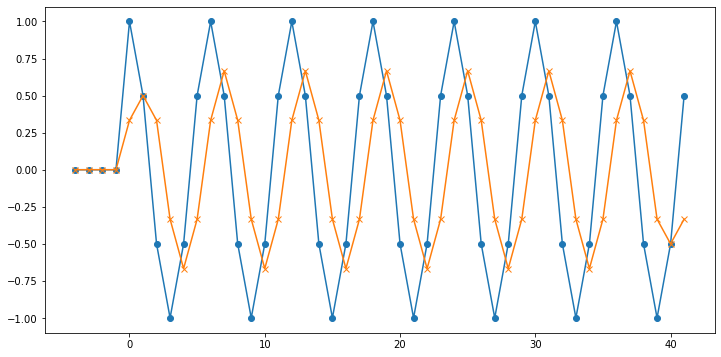

In [22]:
N = 6
n = np.array( list(range(-4, 40)))
def x(n):
    return np.heaviside(n, 1) * np.cos( 2 * np.pi *n / N)
h = np.array([1,1,1], dtype = np.float32) / 3
z = np.convolve(x(n), h, 'full')
n2 = np.array( list(range(-4, 40+2)))
plt.figure(figsize = (12,6))
plt.plot( n2, x(n2), 'o-')
plt.plot(n2, z, 'x-')

## Linear and Non-linear Filtering

In [23]:
T = 40
M = 3
N = 200
h = np.ones(shape = [M], dtype = np.float32) / M
n1 = np.array( list(range(-4, N)))
n2 = np.array( list(range(-4, N+M-1)))
def x(n):
    return np.heaviside(n, 1) * np.cos( 2 * np.pi * n / T)

<StemContainer object of 3 artists>

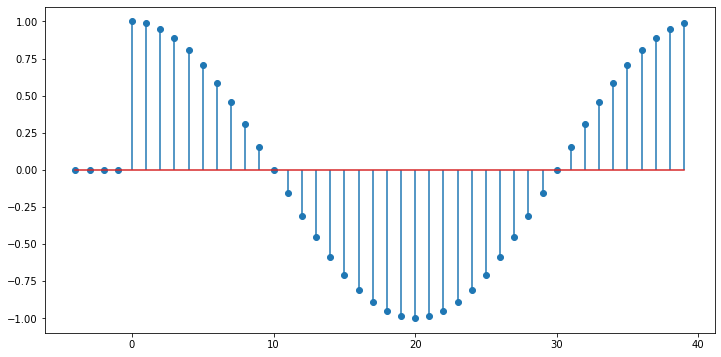

In [24]:
plt.figure(figsize = (12,6))
plt.stem(n, x(n))

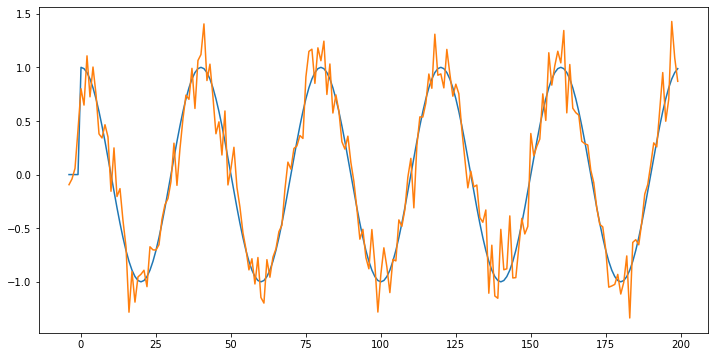

In [25]:
noise = 0.2 * np.random.normal(size=[len(n2)])
z = np.convolve(x(n1) + noise[:len(n1)], h, 'full')
plt.figure(figsize = (12,6))
plt.plot( n1, x(n1))
plt.plot( n1, x(n1) + noise[:len(n1)])

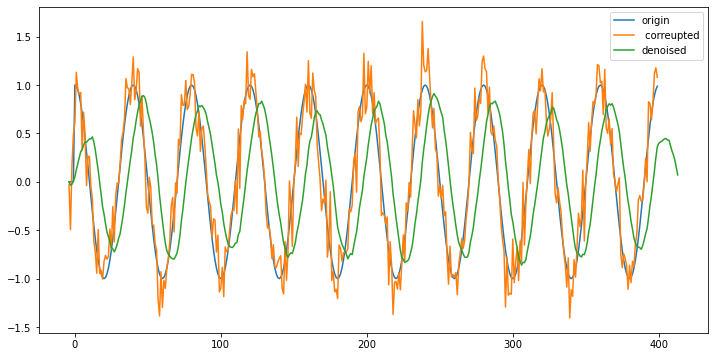

In [26]:
T = 40
M = 15
N = 400
h = np.ones(shape = [M], dtype = np.float32) / M
n1 = np.array( list(range(-4, N)))
n2 = np.array( list(range(-4, N+M-1)))
def x(n):
    return np.heaviside(n, 1) * np.cos( 2 * np.pi * n / T)

noise = 0.2 * np.random.normal(size=[len(n2)])
z = np.convolve(x(n1) + noise[:len(n1)], h, 'full')
plt.figure(figsize = (12,6))
plt.plot( n1, x(n1), label = 'origin')
plt.plot( n1, x(n1) + noise[:len(n1)], label = ' correupted')
plt.plot( n2, z, label = 'denoised')
plt.legend()
